In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

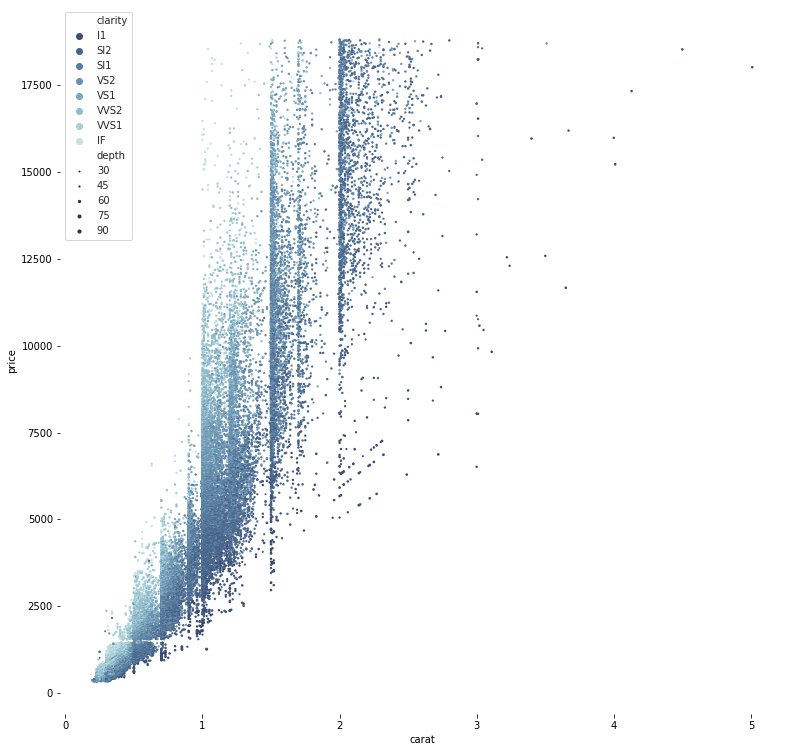

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))
palette="ch:r=-.2,d=.3_r"
variable = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

#code here
with sns.axes_style('white'):
  ax = sns.scatterplot(x='carat',
                  y='price',
                  data=df,
                  palette=palette,
                  size='depth',
                  hue='clarity',
                  sizes=(1,10),
                  linewidth=0,
                  hue_order=variable)

sns.despine(fig, left=True, bottom=True)
plt.show() 

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


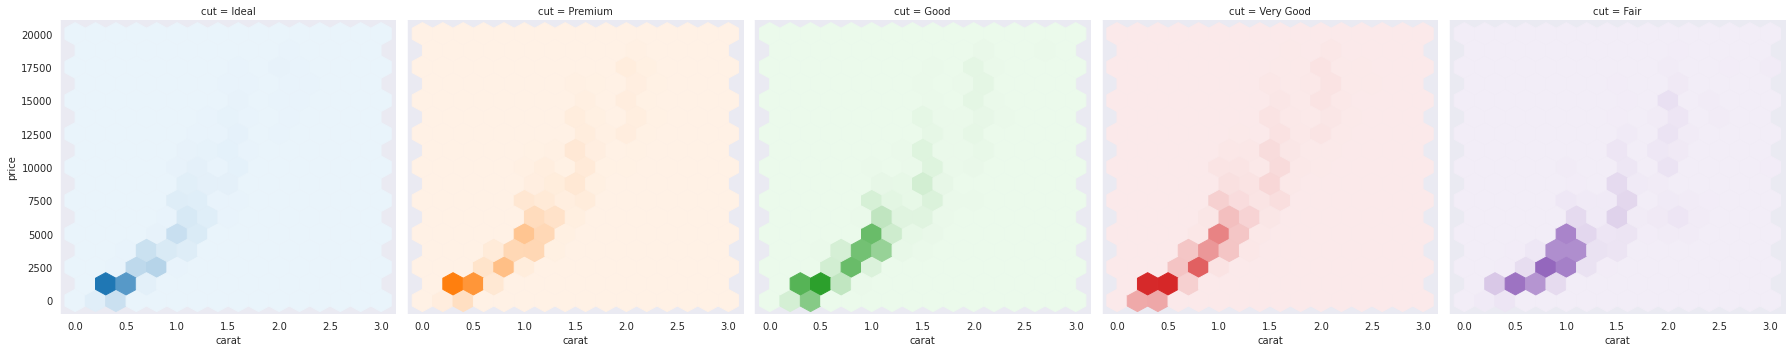

In [ ]:
#code here
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style('dark'):
  grid = sns.FacetGrid(df, col='cut', hue='cut', height=5)
  grid.map(hexbin, 'carat', 'price', extent=[0,3.0,0,20000])

Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

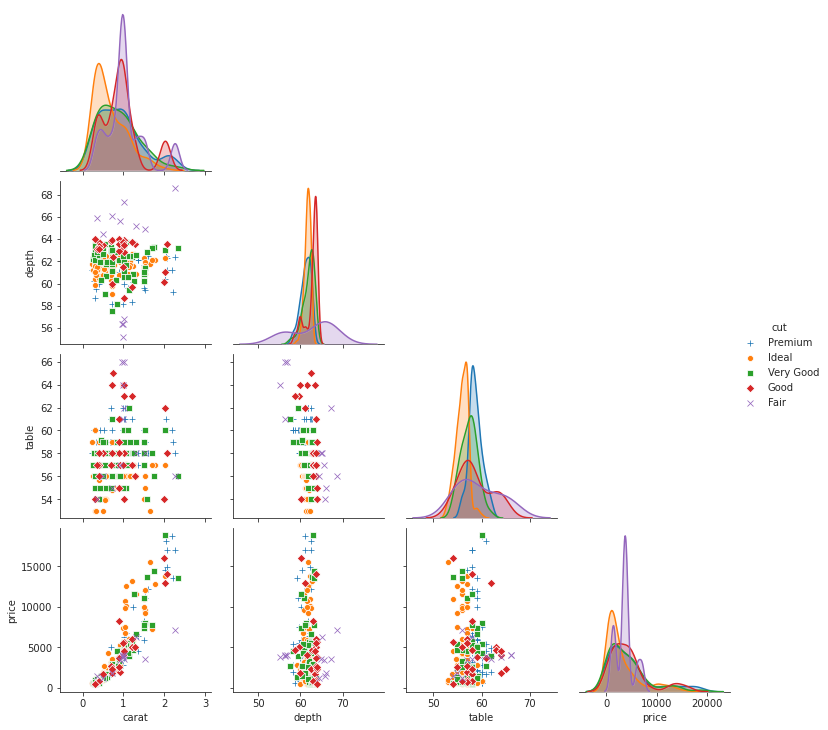

In [6]:
df = df.sample(n=300, random_state=123)

#code here
with sns.axes_style('ticks'):
  sns.pairplot(data=df,
               corner=True,
               diag_kind='kde',
               hue='cut',
               markers=['+','o','s','D','x'],
               hue_order=['Premium','Ideal','Very Good', 'Good', 'Fair'],
               y_vars=['carat','depth','table','price'],
               x_vars=['carat','depth','table','price'])           

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


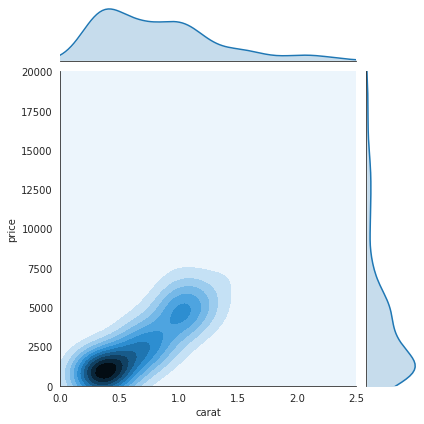

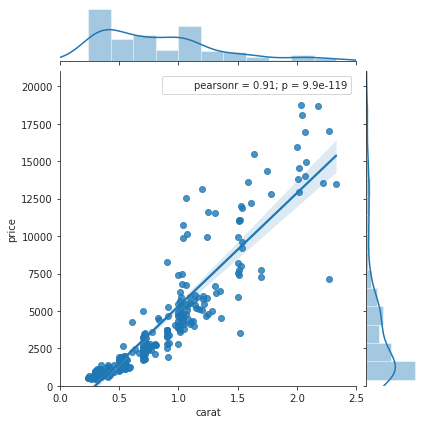

In [10]:
#code here
import scipy.stats as stats

with sns.axes_style('white'):
    sns.jointplot(x='carat', y='price', data=df, kind='kde', xlim=(0,2.5), ylim=(0,20000))

with sns.axes_style('ticks'):    
    sns.jointplot(x='carat', y='price', data=df, kind='reg', xlim=(0,2.5), ylim=(0,21000), stat_func=stats.pearsonr)
plt.show()    

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)